In [38]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv('C:\\Users\\pavan\\OneDrive\\Documents\\airline-passengers.csv',usecols=[1])
df

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


# 1)a   Time series data plot.

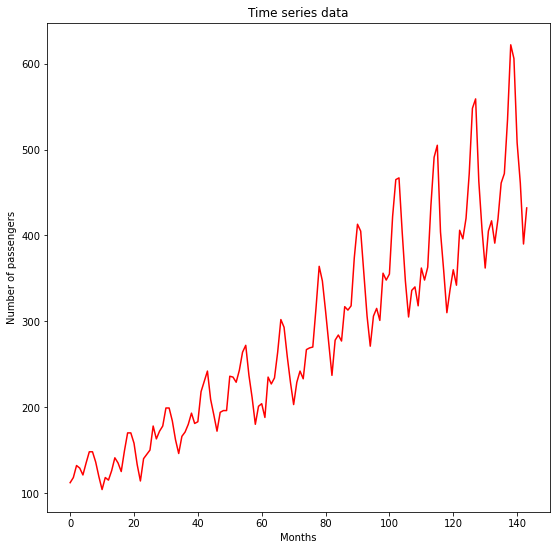

In [40]:
plt.figure(figsize=(9,9))
plt.title("Time series data")
plt.plot(df, color='red')
plt.xlabel('Months')
plt.ylabel('Number of passengers')
plt.show()

# 1)b    short-term and long-term temporal patterns that you see in data considering that this is monthly number of airline passengers.

Short-term temporal patterns :
As we know that short term temporal patterns are the patterns that occur consistently with in a short period of time. Here,from the above plot it is clear that the time series data is fluctuated for months and also decreasing trend is also observed.

Long-term temporal patterns :
But long term temporal patterns are the patterns which follows increasing trend in the above time series data. Here,this trend is increased with respect to the every month. Also,this long term pattern lasted till the end in this time series data.

# 1)c

In [15]:
# Fix the random number seed to 0 in numpy for reproducibility
np.random.seed(0)
# convert the integer values in the data to floating point values.
data = df.astype('float64')
# Normalize the data to range (0, 1) with Minmax scaler.
scaler = MinMaxScaler(feature_range=(0,1))
df_data = scaler.fit_transform(data)
df_data


array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [17]:
# Split the first 67% of the data as training data and the remaining 33% as testing data.
training_data = int(len(df_data)* 0.67)
testing_data = len(df_data)-training_data
train, test = df_data[0:training_data,:], df_data[training_data:len(df_data),:]
train


array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [18]:
test

array([[0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.633

In [19]:
# Obtain the two-column input-output dataset to be used in LSTM.
def two_column(df_data, time_step = 1):
    X,Y = [],[]
    for i in  range(len(df_data)-time_step):
        X.append(df_data[i:(i+time_step)])
        Y.append(df_data[i+time_step])
    return np.array(X),np.array(Y)
time_step = 1
X_train, Y_train = two_column(train,time_step)
X_test, Y_test = two_column(test,time_step)
# Reshape the input data to be in the [samples, time steps, features] format.
X_train  = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [20]:
X_train

array([[[0.01544402]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984556]],

       [[0.08494208]],

       [[0.08494208]],

       [[0.06177606]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123552]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984556]],

       [[0.04054054]],

       [[0.08687259]],

       [[0.12741313]],

       [[0.12741313]],

       [[0.1042471 ]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949807]],

       [[0.07915058]],

       [[0.08880309]],

       [[0.14285714]],

       [[0.11389961]],

       [[0.13127413]],

       [[0.14285714]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444015]],

       [[0.11196911]],

       [[0.08108108]],

       [[0.11969112]],

       [[0.12934363]],

       [[0.14671815]],

       [[0.17181467]],

       [[0.14864865]],

       [[0.15250965]],

       [[0.22007

In [21]:
X_test

array([[[0.40733591]],

       [[0.38030888]],

       [[0.48648649]],

       [[0.47104247]],

       [[0.48455598]],

       [[0.61389961]],

       [[0.6969112 ]],

       [[0.7007722 ]],

       [[0.57915058]],

       [[0.46911197]],

       [[0.38803089]],

       [[0.44787645]],

       [[0.45559846]],

       [[0.41312741]],

       [[0.4980695 ]],

       [[0.47104247]],

       [[0.5       ]],

       [[0.63899614]],

       [[0.74710425]],

       [[0.77413127]],

       [[0.57915058]],

       [[0.49227799]],

       [[0.3976834 ]],

       [[0.44980695]],

       [[0.49420849]],

       [[0.45945946]],

       [[0.58301158]],

       [[0.56370656]],

       [[0.61003861]],

       [[0.71042471]],

       [[0.85714286]],

       [[0.87837838]],

       [[0.69305019]],

       [[0.58494208]],

       [[0.4980695 ]],

       [[0.58108108]],

       [[0.6042471 ]],

       [[0.55405405]],

       [[0.60810811]],

       [[0.68918919]],

       [[0.71042471]],

       [[0.83204

In [22]:
# Build the LSTM network with a hidden layer of 4 neurons, and an output layer with a single neuron.
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape= (1,1)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs= 100, batch_size = 1 , verbose =1)

Epoch 1/100
95/95 [==============================] - 8s 23ms/step - loss: 0.0328 - val_loss: 0.1310
Epoch 2/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0127 - val_loss: 0.0923
Epoch 3/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0102 - val_loss: 0.0596
Epoch 4/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0074 - val_loss: 0.0293
Epoch 5/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0047 - val_loss: 0.0186
Epoch 6/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0033 - val_loss: 0.0114
Epoch 7/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0026 - val_loss: 0.0101
Epoch 8/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0025 - val_loss: 0.0105
Epoch 9/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0024 - val_loss: 0.0110
Epoch 10/100
95/95 [==============================] - 1s 6ms/step - loss: 0.0025 - val_loss: 0.0121
Epoch 11

In [23]:
# Predict the next month’s number of passengers.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [24]:
train_predict

array([[0.02379008],
       [0.03503137],
       [0.06147737],
       [0.05578737],
       [0.04067418],
       [0.06717858],
       [0.09199516],
       [0.09199516],
       [0.06908134],
       [0.03691072],
       [0.00890188],
       [0.03503137],
       [0.02940311],
       [0.05010926],
       [0.07861163],
       [0.06717858],
       [0.04821932],
       [0.09391052],
       [0.13427058],
       [0.13427058],
       [0.11118058],
       [0.06337658],
       [0.02753037],
       [0.07670347],
       [0.08625396],
       [0.09582668],
       [0.14968283],
       [0.12079488],
       [0.138123  ],
       [0.14968283],
       [0.19009845],
       [0.19009845],
       [0.16124195],
       [0.11887116],
       [0.08816684],
       [0.12656838],
       [0.1361967 ],
       [0.15353623],
       [0.17856652],
       [0.15546283],
       [0.1593157 ],
       [0.22645234],
       [0.24922681],
       [0.27180812],
       [0.20926926],
       [0.17471889],
       [0.138123  ],
       [0.180

In [25]:
test_predict

array([[0.40298066],
       [0.3788195 ],
       [0.470474  ],
       [0.45770517],
       [0.4688889 ],
       [0.56797683],
       [0.62390924],
       [0.62636817],
       [0.54279023],
       [0.45609513],
       [0.38577706],
       [0.4381815 ],
       [0.44473812],
       [0.40808758],
       [0.47991875],
       [0.45770517],
       [0.48148164],
       [0.5855119 ],
       [0.6549152 ],
       [0.6707684 ],
       [0.54279023],
       [0.47521058],
       [0.39441338],
       [0.4398252 ],
       [0.47678307],
       [0.4479984 ],
       [0.54564095],
       [0.53125656],
       [0.5652306 ],
       [0.63246095],
       [0.7159691 ],
       [0.7267288 ],
       [0.621438  ],
       [0.54706144],
       [0.47991875],
       [0.5442172 ],
       [0.5610866 ],
       [0.52394193],
       [0.5638524 ],
       [0.61895406],
       [0.63246095],
       [0.7028414 ],
       [0.7826543 ],
       [0.7693211 ],
       [0.6740908 ],
       [0.61895406],
       [0.52246916]], dtype=float3

In [26]:
# invert the predictions using the “inverse-transform” attribute of MinMaxScaler.
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)


In [116]:
# calculate root-mean-squared-error.
train_score = math.sqrt(mean_squared_error(Y_train, train_predict[:,0]))
print('Train score :%.2f RMSE' %(train_score))

Train score :22.84 RMSE


In [117]:
test_score = math.sqrt(mean_squared_error(Y_test,test_predict[:,0]))
print('Test score :%.2f RMSE' %(test_score))

Test score :56.38 RMSE


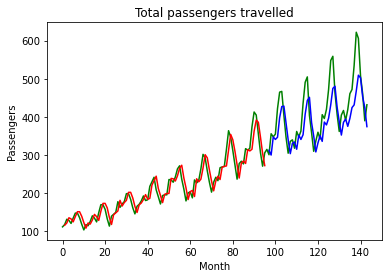

In [27]:
# Align and plot the actual and predicted values for the entire dataset.
predict_train_plot = np.empty_like(df_data)
predict_train_plot[:,:] = np.nan
predict_train_plot[time_step:len(train_predict)+ time_step,:] = train_predict
predict_test_plot = np.empty_like(df_data)
predict_test_plot[:,:]= np.nan
predict_test_plot[len(train_predict)+(time_step*2):len(df_data), :] = test_predict
df["train_predict"] = predict_train_plot
df["Test_predict"] = predict_test_plot
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title("Total passengers travelled")
plt.plot(scaler.inverse_transform(df_data),color = 'g', label = "passengers")
plt.plot(predict_train_plot,color = 'r', label = "Train prediction")
plt.plot(predict_test_plot,color = 'b', label = "Test prediction" )
plt.show()



# 1)d

In [28]:
# build an LSTM network using Keras to predict the next month’s value given this month and the previous two months,i.e., input size of 3.
time_step = 3
# Obtain the two-column input-output dataset to be used in LSTM.
def two_column(df_data, time_step):
    X,Y = [],[]
    for i in  range(len(df_data)-time_step):
        X.append(df_data[i:(i+time_step)])
        Y.append(df_data[i+time_step])
    return np.array(X),np.array(Y)
X_train, Y_train = two_column(train,time_step)
X_test, Y_test = two_column(test,time_step)
# Reshape the input data to be in the [samples, time steps, features] format.
X_train  = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [29]:
#  Build the LSTM network with a hidden layer of 4 neurons, and an output layer with a single neuron.
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape= (1,time_step)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs= 100, batch_size = 1 , verbose =1)

Epoch 1/100
93/93 [==============================] - 9s 23ms/step - loss: 0.0353 - val_loss: 0.1345
Epoch 2/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0112 - val_loss: 0.0636
Epoch 3/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0085 - val_loss: 0.0519
Epoch 4/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0066 - val_loss: 0.0334
Epoch 5/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0053 - val_loss: 0.0249
Epoch 6/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0046 - val_loss: 0.0229
Epoch 7/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0044 - val_loss: 0.0185
Epoch 8/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0040 - val_loss: 0.0165
Epoch 9/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0042 - val_loss: 0.0155
Epoch 10/100
93/93 [==============================] - 1s 6ms/step - loss: 0.0038 - val_loss: 0.0162
Epoch 11

In [30]:
train_predict_3 = model.predict(X_train)
test_predict_3 = model.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [31]:
train_predict_3

array([[0.0715942 ],
       [0.0644997 ],
       [0.05211315],
       [0.07986908],
       [0.10228119],
       [0.10202699],
       [0.07998281],
       [0.04975806],
       [0.02368139],
       [0.04820432],
       [0.0381323 ],
       [0.06147768],
       [0.08864788],
       [0.0758948 ],
       [0.06004898],
       [0.1085246 ],
       [0.14668109],
       [0.14554036],
       [0.12305447],
       [0.07542566],
       [0.04263561],
       [0.09176505],
       [0.09407861],
       [0.10749561],
       [0.167003  ],
       [0.12897207],
       [0.15542798],
       [0.16426548],
       [0.21032077],
       [0.20520763],
       [0.17454952],
       [0.13172366],
       [0.1021532 ],
       [0.14427471],
       [0.14819387],
       [0.16927089],
       [0.19626534],
       [0.16755193],
       [0.17656757],
       [0.2528248 ],
       [0.26958564],
       [0.2950546 ],
       [0.21882638],
       [0.19090396],
       [0.15207817],
       [0.20299534],
       [0.1992687 ],
       [0.201

In [32]:
test_predict_3

array([[0.5076415 ],
       [0.46935213],
       [0.48243317],
       [0.6044025 ],
       [0.64821196],
       [0.6229043 ],
       [0.50526047],
       [0.42965433],
       [0.379921  ],
       [0.4645521 ],
       [0.46182385],
       [0.41384086],
       [0.51038086],
       [0.46551016],
       [0.49737006],
       [0.623639  ],
       [0.68387353],
       [0.670848  ],
       [0.48227945],
       [0.4476786 ],
       [0.38453564],
       [0.4635891 ],
       [0.5005363 ],
       [0.45309648],
       [0.58028764],
       [0.5354454 ],
       [0.5760865 ],
       [0.6553392 ],
       [0.74687374],
       [0.72142273],
       [0.54850644],
       [0.49815765],
       [0.45717254],
       [0.56462014],
       [0.57196385],
       [0.5138025 ],
       [0.5752199 ],
       [0.63824344],
       [0.6335543 ],
       [0.72152066],
       [0.81453395],
       [0.74410516],
       [0.5847835 ],
       [0.56068206],
       [0.4764374 ]], dtype=float32)

In [33]:
# invert the predictions using the “inverse-transform” attribute of MinMaxScaler.
train_predict_3 = scaler.inverse_transform(train_predict_3)
Y_train = scaler.inverse_transform(Y_train)
test_predict_3 = scaler.inverse_transform(test_predict_3)
Y_test = scaler.inverse_transform(Y_test)

In [134]:
# calculate root-mean-squared-error.
train_score_3 = math.sqrt(mean_squared_error(Y_train, train_predict_3[:,0]))
print('Train score with input size 3 is :%.2f RMSE' %(train_score_3))

Train score with input size 3 is :21.37 RMSE


In [135]:
test_score_3 = math.sqrt(mean_squared_error(Y_test,test_predict_3[:,0]))
print('Test score with input size 3 is  :%.2f RMSE' %(test_score_3))

Test score with input size 3 is  :62.53 RMSE


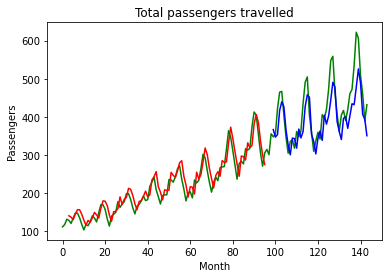

In [36]:
# Align and plot the actual and predicted values for the entire dataset.
predict_train_plot = np.empty_like(df_data)
predict_train_plot[:,:] = np.nan
predict_train_plot[time_step:len(train_predict_3)+ time_step,:] = train_predict_3
predict_test_plot = np.empty_like(df_data)
predict_test_plot[:,:]= np.nan
predict_test_plot[len(train_predict_3)+(time_step*2):len(df_data), :] = test_predict_3
df["train_predict_3"] = predict_train_plot
df["Test_predict_3"] = predict_test_plot
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title("Total passengers travelled")
plt.plot(scaler.inverse_transform(df_data),color = 'g', label = "passengers")
plt.plot(predict_train_plot,color = 'r', label = "Train prediction")
plt.plot(predict_test_plot,color = 'b', label = "Test prediction" )
plt.show()
